## Tensorflow for machine learnign 
Summary Chapter
Scopes

In [1]:
import tensorflow as tf
import numpy as np
import PIL.Image as Image

In [2]:
graph = tf.Graph()

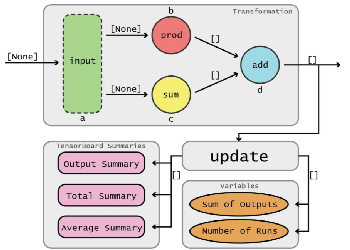

In [3]:
im = Image.open('/Users/mbledowski/Desktop/graph_schema.png')
im.resize((350,250))

In [4]:
with graph.as_default():
    with tf.name_scope("Variables"):
        global_step = tf.Variable(0, dtype=tf.float32, trainable=False,name='global_step')
        total_output = tf.Variable(0.0, dtype=tf.float32, trainable=False, name='total_output')
        
    with tf.name_scope("Transformation"):
        a = tf.placeholder(shape=[None], dtype=tf.float32, name='input_placeholder_a')        
        b = tf.reduce_prod(a, name="reduce_prod_a")
        c = tf.reduce_sum(a, name="reduce_sum_a")
        d = tf.add(b,c, name="add_b_c")
        
    with tf.name_scope("Update"):
        increment_step = global_step.assign_add(1) # number of runs
        update_total = total_output.assign_add(d)
        
    with tf.name_scope("Summaries"):
        sums_summary = tf.scalar_summary(b'Sum single run', d, name="output_summary")
        update_total_summ = tf.scalar_summary(b'Total Rolling SUmmary', update_total)
        merged_summaries = tf.merge_all_summaries()
        
    with tf.name_scope("Global_Ops"):    
        init = tf.initialize_all_variables()

In [5]:
input_dict = {a:np.array([3,5,7,17], dtype=np.float32)}

with tf.Session(graph=graph) as sess:
    sess.run(tf.initialize_all_variables())
    for i in range(10):
        print sess.run([increment_step, global_step, update_total, total_output], feed_dict=input_dict)        

[1.0, 1.0, 1817.0, 1817.0]
[2.0, 2.0, 3634.0, 3634.0]
[3.0, 3.0, 5451.0, 5451.0]
[4.0, 4.0, 7268.0, 7268.0]
[5.0, 5.0, 9085.0, 9085.0]
[6.0, 6.0, 10902.0, 10902.0]
[7.0, 7.0, 12719.0, 12719.0]
[8.0, 8.0, 14536.0, 14536.0]
[9.0, 9.0, 16353.0, 16353.0]
[10.0, 10.0, 18170.0, 18170.0]


In [6]:
sess = tf.Session(graph=graph)
writer = tf.train.SummaryWriter('./name_scope_full', graph)
sess.run(init)

In [7]:
# input_dict = {a:np.array(np.random.randint(low=1, high=10, size=3), dtype=np.float32)}
# sess.run([increment_step, update_total, total_output], feed_dict=input_dict)

In [8]:
def run_graph():
    input_dict = {a:np.array(np.random.randint(low=1, high=10, size=3), dtype=np.float32)}
    s, t, summary, ms = sess.run([increment_step, total_output, sums_summary, merged_summaries], feed_dict=input_dict)
    writer.add_summary(ms, global_step=s)

In [9]:
for i in range(20):
    run_graph()

In [10]:
saver = tf.train.Saver()
saver.save(sess, 'my-session')

ValueError: No variables to save

In [11]:
writer.flush()
writer.close()
sess.close()

#### testing input

In [12]:
#x = tf.Variable(tf.random_normal(shape=[1,3], dtype=tf.float32))
x = tf.placeholder(shape=None, dtype=tf.float32)
#y = tf.Variable(tf.random_normal(shape=[1,3], dtype=tf.float32))
#output = tf.matmul(x,x, transpose_b=True)
output = tf.reduce_sum(x)

input_dict = {x:np.array([4,7,8], dtype=np.float32).reshape(1,-1)}

sess = tf.Session()
#init = tf.initialize_all_variables()
#sess.run(init)
sess.run([x,output], feed_dict=input_dict)
#sess.run(x, feed_dict=input_dict)

[array([[ 4.,  7.,  8.]], dtype=float32), 19.0]